In [1]:
import pandas as pd
df = pd.read_csv('C:/Users/user2222/Documents/One Campus SQL/diabetes-1.csv')

In [2]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Data Traansformation Stages


    #Rescale data.
    #Standardize data.
    #Normalize data.
    #Binarize data

In [3]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
#Data Transformation Stages
#Rescale data #You need to to rescaling when min and max ie range of each feature is not close to one another.
#standardize data #When you check the error for each of the distribution, If the standard error i.e standard deviation is more than 1.0
#across each of these features we might need  standardize The data.
#Normalize data # You need normalization to make unnormal data normal.



In [16]:
# Statistical challenges with our data

#1. Very wide scales in the features : Requires Rescaling
#2. Very high standard deviation in the features: Requires Standardization
#3. Non Normal distribution: Normalize  
    

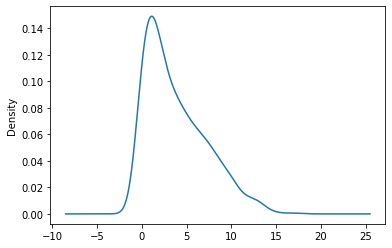

In [18]:
import matplotlib.pyplot as plt

df.Pregnancies.plot(kind='density')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.shape

(768, 9)

In [7]:
# we never rescale our outcome variable.

In [8]:
#df.values will turn the dataframe to array in which each row will be treated as an array.

In [9]:
dfArr =df.values
dfArr

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [10]:
dfArr[1] #Fetch second row in the dataframe.

array([ 1.   , 85.   , 66.   , 29.   ,  0.   , 26.6  ,  0.351, 31.   ,
        0.   ])

In [19]:
# RESCALING

# Rescale data (between 0 and 1)

from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
'''# We must convert our dataframe into an array before we can 
implement any feature transformation. We call .values on the dataframe'''

'''
We do not apply transformations to the target column
We must seperate the target column from the input columns before transformation
'''
dfArr = df.values

#X = dfArr[0:767,0:8]
#Y = dfArr[0:767,8]

X = dfArr[:,0:8]
Y = dfArr[:,8]

scaler = MinMaxScaler(feature_range=(0, 1)) #Caalling the constructor of the MinMaxScaler Class. Specify range
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=1)
rescaledX

array([[0.4, 0.7, 0.6, ..., 0.5, 0.2, 0.5],
       [0.1, 0.4, 0.5, ..., 0.4, 0.1, 0.2],
       [0.5, 0.9, 0.5, ..., 0.3, 0.3, 0.2],
       ...,
       [0.3, 0.6, 0.6, ..., 0.4, 0.1, 0.2],
       [0.1, 0.6, 0.5, ..., 0.4, 0.1, 0.4],
       [0.1, 0.5, 0.6, ..., 0.5, 0.1, 0. ]])

In [20]:
# converting the rescaled X to a dataframe and adding back Y

rescaledXDF = pd.DataFrame(rescaledX, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column

print(rescaledXDF)
rescaledXDF['Outcome'] = df['Outcome']
print(rescaledXDF)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.507538       0.622951       0.484848  0.212766  0.490313   
764     0.117647  0.613065       0.573770       0.272727  0.000000  0.548435   
765     0.294118  0.608040       0.590164       0.232323  0.132388  0.390462   
766     0.058824  0.633166       0.491803       0.000000  0.000000  0.448584   
767     0.058824  0.467337       0.573770       0.313131  0.000000  0.453055   

     DiabetesPedigreeFunction       Age

In [21]:
# STANDARDIZING THE RESCALED DATA
# CONTINUING TRANSFORMATION USING THE OUT FROM THE RESCALING TRANSFORMATION STAGE

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

##  rescaledXDF
rescaledXDF_Arr = rescaledXDF.values

X = rescaledXDF_Arr[:,0:8]
Y = rescaledXDF_Arr[:,8]

scaler = StandardScaler().fit(X)
rescaledX_std = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX_std)

# converting the rescaled X to a dataframe and adding back Y

rescaledXDF_R_S = pd.DataFrame(rescaledX_std, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column

print(rescaledXDF_R_S)
rescaledXDF_R_S['Outcome'] = rescaledXDF['Outcome']
print(rescaledXDF_R_S)

[[ 0.64   0.848  0.15  ...  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ... -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ... -1.103  0.604 -0.106]
 ...
 [ 0.343  0.003  0.15  ... -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ... -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ... -0.202 -0.474 -0.871]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.

In [22]:
# INSPECTING THE RESCALED AND STANDRDIZED DATA

rescaledXDF_R_S.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,5.493291e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,2.620878e-16,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,4.771845e-16,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,-1.750625e-16,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,9.569891e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,-2.201653e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,3.866988e-17,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,4.770490e-18,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


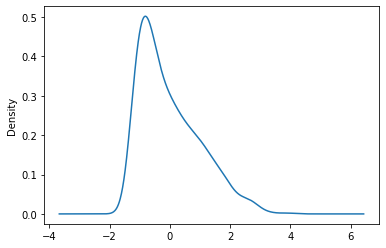

In [23]:
rescaledXDF_R_S.Pregnancies.plot(kind='density')

In [24]:
# IMPLEMENTING NORMALIZATION ON THE RESCALED AND STANDARDIZED DATA

from sklearn.preprocessing import Normalizer

from numpy import set_printoptions

rescaledXDF_R_S_Arr = rescaledXDF_R_S.values

X = rescaledXDF_R_S_Arr[:,0:8]
Y = rescaledXDF_R_S_Arr[:,8]

scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)


print(normalizedX)




# converting the rescaled X to a dataframe and adding back Y

normalizedX_R_S_N = pd.DataFrame(normalizedX, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column

print(normalizedX_R_S_N)
normalizedX_R_S_N['Outcome'] = rescaledXDF_R_S['Outcome']
print(normalizedX_R_S_N)

[[ 0.294  0.389  0.069 ...  0.094  0.215  0.654]
 [-0.458 -0.609 -0.087 ... -0.371 -0.198 -0.103]
 [ 0.409  0.644 -0.087 ... -0.366  0.2   -0.035]
 ...
 [ 0.298  0.003  0.13  ... -0.638 -0.595 -0.239]
 [-0.391  0.074 -0.218 ... -0.111 -0.172  0.542]
 [-0.457 -0.473  0.025 ... -0.109 -0.256 -0.472]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.293647  0.389263       0.068664       0.416311 -0.317941  0.093614   
1      -0.458093 -0.609101      -0.087047       0.287852 -0.375682 -0.371091   
2       0.408951  0.644218      -0.087479      -0.426959 -0.229648 -0.365657   
3      -0.425010 -0.502137      -0.080761       0.077736  0.062026 -0.248523   
4      -0.186954  0.082528      -0.246360       0.148546  0.125389  0.230816   
..           ...       ...            ...            ...       ...       ...   
763     0.474619 -0.161678       0.092553       0.447334  0.225917  0.029905   
764    -0.412899  0.026072       0.034849       0.305535 -0.

In [25]:
normalizedX_R_S_N.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,-0.029202,0.372804,-0.778874,-0.329314,-0.116355,0.266900,0.891015
Glucose,768.0,-0.035199,0.370004,-0.917873,-0.302614,-0.051836,0.226748,0.936682
BloodPressure,768.0,0.015273,0.304359,-0.891431,-0.137178,0.049074,0.215058,0.772424
SkinThickness,768.0,0.008376,0.386974,-0.829106,-0.324046,0.057186,0.327209,0.818977
Insulin,768.0,-0.020091,0.328127,-0.644321,-0.272916,-0.147720,0.187654,0.899737
BMI,768.0,-0.013928,0.338886,-0.909906,-0.270521,0.000576,0.222935,0.851350
DiabetesPedigreeFunction,768.0,-0.033374,0.342877,-0.773632,-0.290049,-0.123026,0.186248,0.913122
Age,768.0,-0.049970,0.369252,-0.732146,-0.355483,-0.140985,0.227950,0.909759
Outcome,768.0,0.348958,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


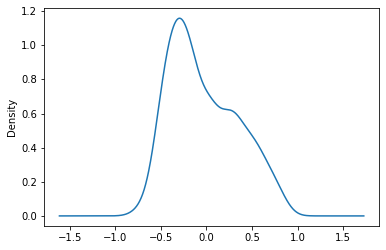

In [26]:
normalizedX_R_S_N.Pregnancies.plot(kind='density')

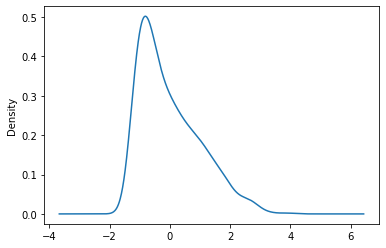

In [27]:
rescaledXDF_R_S.Pregnancies.plot(kind='density')

In [28]:
# DIGRESSION
# TESTING THE EFFECT OF ONLY NORMALIZATION ON THE STRATISTICAL BEHAVIOR OF DATA

# IMPLEMENTING NORMALIZATION ON THE RESCALED AND STANDARDIZED DATA

from sklearn.preprocessing import Normalizer

from numpy import set_printoptions

rescaledDF = df.values
#X =dfArr[0:767,0:8]
#Y =dfArr[0:767,8]

X = rescaledDF[:,0:8]
Y = rescaledDF[:,8]

scaler = Normalizer().fit(X)
normalizedX_N = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)#When displaying the output, display with 3 decimal places


print(normalizedX_N)

# converting the rescaled X to a dataframe and adding back Y

normalizedX_N = pd.DataFrame(normalizedX_N, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column

print(normalizedX_N)
normalizedX_N['Outcome'] = df['Outcome']
print(normalizedX_N)

[[0.034 0.828 0.403 ... 0.188 0.004 0.28 ]
 [0.008 0.716 0.556 ... 0.224 0.003 0.261]
 [0.04  0.924 0.323 ... 0.118 0.003 0.162]
 ...
 [0.027 0.651 0.388 ... 0.141 0.001 0.161]
 [0.007 0.838 0.399 ... 0.2   0.002 0.313]
 [0.008 0.736 0.554 ... 0.241 0.002 0.182]]
     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.033552  0.827625       0.402628       0.195722  0.000000  0.187893   
1       0.008424  0.716040       0.555984       0.244296  0.000000  0.224079   
2       0.040398  0.924097       0.323181       0.000000  0.000000  0.117658   
3       0.006612  0.588467       0.436392       0.152076  0.621527  0.185797   
4       0.000000  0.596386       0.174127       0.152361  0.731335  0.187622   
..           ...       ...            ...            ...       ...       ...   
763     0.042321  0.427443       0.321640       0.203141  0.761779  0.139236   
764     0.013304  0.811526       0.465629       0.179600  0.000000  0.244788   
765     0.026915

In [29]:
normalizedX_N.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.022645,0.020956,0.00000,0.006476,0.016716,0.033330,0.117208
Glucose,768.0,0.682903,0.161166,0.00000,0.587637,0.704501,0.801606,0.973682
BloodPressure,768.0,0.402801,0.153428,0.00000,0.317522,0.430685,0.511070,0.848036
SkinThickness,768.0,0.112086,0.092546,0.00000,0.000000,0.114464,0.181524,0.419691
Insulin,768.0,0.318921,0.338570,0.00000,0.000000,0.249215,0.632833,0.970458
BMI,768.0,0.186874,0.063402,0.00000,0.146291,0.186167,0.226831,0.400734
DiabetesPedigreeFunction,768.0,0.002710,0.001902,0.00025,0.001379,0.002159,0.003507,0.013417
Age,768.0,0.195434,0.080940,0.03246,0.139930,0.181108,0.239313,0.616539
Outcome,768.0,0.348958,0.476951,0.00000,0.000000,0.000000,1.000000,1.000000


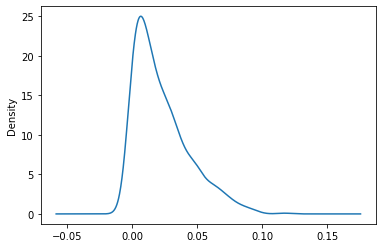

In [30]:
normalizedX_N.Pregnancies.plot(kind='density')

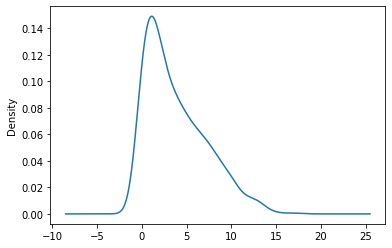

In [31]:
df.Pregnancies.plot(kind='density')

In [32]:
rescaledXDF.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,0.226180,0.198210,0.0,0.058824,0.176471,0.352941,1.0
Glucose,768.0,0.607510,0.160666,0.0,0.497487,0.587940,0.704774,1.0
BloodPressure,768.0,0.566438,0.158654,0.0,0.508197,0.590164,0.655738,1.0
SkinThickness,768.0,0.207439,0.161134,0.0,0.000000,0.232323,0.323232,1.0
Insulin,768.0,0.094326,0.136222,0.0,0.000000,0.036052,0.150414,1.0
BMI,768.0,0.476790,0.117499,0.0,0.406855,0.476900,0.545455,1.0
DiabetesPedigreeFunction,768.0,0.168179,0.141473,0.0,0.070773,0.125747,0.234095,1.0
Age,768.0,0.204015,0.196004,0.0,0.050000,0.133333,0.333333,1.0
Outcome,768.0,0.348958,0.476951,0.0,0.000000,0.000000,1.000000,1.0


In [33]:
# Standardizing 
# Digression: Demonstrating how standardization transforms the original data [DO NOT DO THIS IN REAL LIFE]

from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions

dfArr = df.values

#X = dfArr[0:767,0:8]
#Y = dfArr[0:767,8]

X = dfArr[:,0:8]
Y = dfArr[:,8]

scaler = StandardScaler().fit(X)
rescaledX_std = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX_std)

[[ 0.64   0.848  0.15  ...  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161 ... -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 ... -1.103  0.604 -0.106]
 ...
 [ 0.343  0.003  0.15  ... -0.735 -0.685 -0.276]
 [-0.845  0.16  -0.471 ... -0.24  -0.371  1.171]
 [-0.845 -0.873  0.046 ... -0.202 -0.474 -0.871]]


In [34]:
# converting the rescaled X to a dataframe and adding back Y

rescaledXDF_std = pd.DataFrame(rescaledX_std, columns =['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])
# adding back the outcome column

print(rescaledXDF_std)
rescaledXDF_std['Outcome'] = df['Outcome']
print(rescaledXDF_std)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age

In [35]:
rescaledXDF_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,2.544261e-17,1.000652,-1.141852,-0.844885,-0.250952,0.639947,3.906578
Glucose,768.0,3.614007e-18,1.000652,-3.783654,-0.685236,-0.121888,0.605771,2.444478
BloodPressure,768.0,-1.327244e-17,1.000652,-3.572597,-0.367337,0.149641,0.563223,2.734528
SkinThickness,768.0,7.994184e-17,1.000652,-1.288212,-1.288212,0.154533,0.719086,4.921866
Insulin,768.0,-3.556183e-17,1.000652,-0.692891,-0.692891,-0.428062,0.412008,6.652839
BMI,768.0,2.295979e-16,1.000652,-4.060474,-0.595578,0.000942,0.584771,4.455807
DiabetesPedigreeFunction,768.0,2.398978e-16,1.000652,-1.189553,-0.688969,-0.300128,0.466227,5.883565
Age,768.0,1.857600e-16,1.000652,-1.041549,-0.786286,-0.360847,0.660206,4.063716
Outcome,768.0,3.489583e-01,0.476951,0.000000,0.000000,0.000000,1.000000,1.000000


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


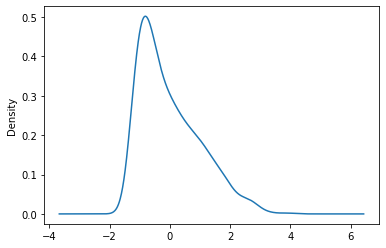

In [37]:
rescaledXDF_std.Pregnancies.plot(kind='density')